<a href="https://colab.research.google.com/github/soumnemishra/Breast_cancer_detection/blob/main/Breast_cancer_final__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTED LIB

In [1]:
# Core libraries for numerical computations, data manipulation, and file handling
import numpy as np  # For numerical operations and handling image data as arrays
import pandas as pd  # For managing tabular data, such as labels or metadata
import os  # For file and directory operations, e.g., navigating dataset folders
import pathlib  # For advanced file path handling, e.g., accessing dataset directories
import shutil  # For file operations like copying or moving dataset files
from glob import glob  # For pattern-based file searching, e.g., loading image files

# Image processing and computer vision libraries
import cv2  # OpenCV for image preprocessing, e.g., resizing or color space conversion
from PIL import Image  # Pillow for image loading and manipulation
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img  # For image data augmentation and preprocessing

# Visualization libraries
import matplotlib.pyplot as plt  # For plotting images, loss curves, and metrics like confusion matrices
from tqdm.keras import TqdmCallback  # For displaying progress bars during model training

# Machine learning and data preprocessing utilities
from sklearn.model_selection import train_test_split  # For splitting dataset into train, validation, and test sets
from sklearn.preprocessing import MinMaxScaler  # For scaling numerical data, e.g., metadata or features
from sklearn.utils.class_weight import compute_class_weight  # For computing class weights to handle class imbalance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score  # For model evaluation metrics and visualizations

# TensorFlow and Keras for deep learning
import tensorflow as tf  # Core TensorFlow library for building and training models
from tensorflow.keras import layers  # Keras layers for building neural network architectures
from tensorflow.keras.models import Sequential, Model  # For defining sequential or functional API models
from tensorflow.keras.layers import (  # Layers for constructing CNNs and other architectures
    Conv2D,  # Convolutional layer for feature extraction from images
    MaxPool2D,  # Max pooling layer for downsampling feature maps
    Flatten,  # Flattens feature maps for dense layers
    Dense,  # Fully connected layer for classification
    Dropout,  # Dropout layer for regularization to prevent overfitting
    BatchNormalization,  # Normalizes layer inputs to stabilize training
    Rescaling,  # Scales pixel values, e.g., to [0,1] for image normalization
    GlobalAveragePooling2D,  # Pools feature maps into a single vector, reducing dimensions
    Input  # Defines input layer for functional API models
)
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3  # Pre-trained models for transfer learning
from tensorflow.keras.optimizers import Adam, AdamW  # Optimizers for model training
from tensorflow.keras.metrics import Precision, Recall  # Metrics for evaluating model performance
from tensorflow.keras.utils import to_categorical  # For converting labels to one-hot encoded format
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For real-time image data augmentation
from tensorflow.keras.callbacks import (  # Callbacks to enhance training
    EarlyStopping,  # Stops training when performance plateaus to prevent overfitting
    ModelCheckpoint,  # Saves the best model based on validation performance
    ReduceLROnPlateau,  # Reduces learning rate when performance stalls
    CSVLogger  # Logs training metrics to a CSV file for analysis
)

# Import Counter
from collections import Counter
#IMPORT K-FOLD
from sklearn.model_selection import KFold







#mounting drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#DATA SETS PATHS

In [3]:
main_dir='/content/drive/MyDrive/breast_cancer_project/MAIN_DATA_FILES'
image_base = '/content/drive/MyDrive/breast_cancer_project/NORMAL_IMAGES'
mask_base = '/content/drive/MyDrive/breast_cancer_project/MASK_IMAGES'

In [4]:
'''VISUALIZING CLASS DISTRIBUTION OF NORMAL IMAGES'''
#the base folder
base_folder = main_dir
# Subfolders / classes
classes = ['benign', 'malignant', 'normal']
counts = {}
total_images = 0 # Initialize a counter for the total number of images

# Count number of images in each subfolder
for cls in classes:
    class_path = os.path.join(base_folder, cls)
    count = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif'))])
    counts[cls] = count
    total_images += count # Add the count from each class to the total

print(f"Total number of images in {main_dir}: {total_images}") # Print the total count

# You can also print the counts per class as before if you still need them
# print(counts)

Total number of images in /content/drive/MyDrive/breast_cancer_project/MAIN_DATA_FILES: 1578


#DATA SET VISUALIZATION

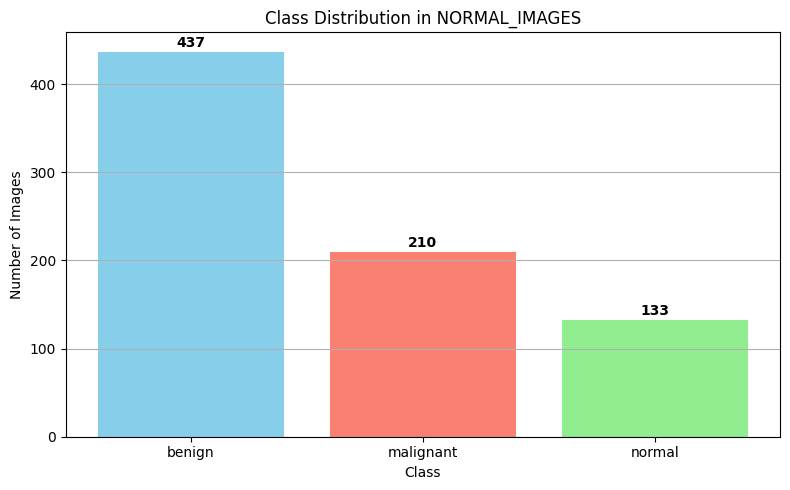

In [5]:
 ########################## NORMAL IMAGES ######################################################
'''VISUALIZING CLASS DISTRIBUTION OF NORMAL IMAGES'''
#the base folder
base_folder = image_base
# Subfolders / classes
classes = ['benign', 'malignant', 'normal']#BENIGN==> 56% (437/780) MALIGNANT==>27%(210/780) NORMAL==>17%(133/780)
counts = {}

# Count number of images in each subfolder
for cls in classes:
    class_path = os.path.join(base_folder, cls)
    count = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif'))])
    counts[cls] = count

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(counts.keys(), counts.values(), color=['skyblue', 'salmon', 'lightgreen'])
plt.title(f'Class Distribution in {os.path.basename(base_folder)}')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.grid(axis='y')

# Add counts on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 2, str(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


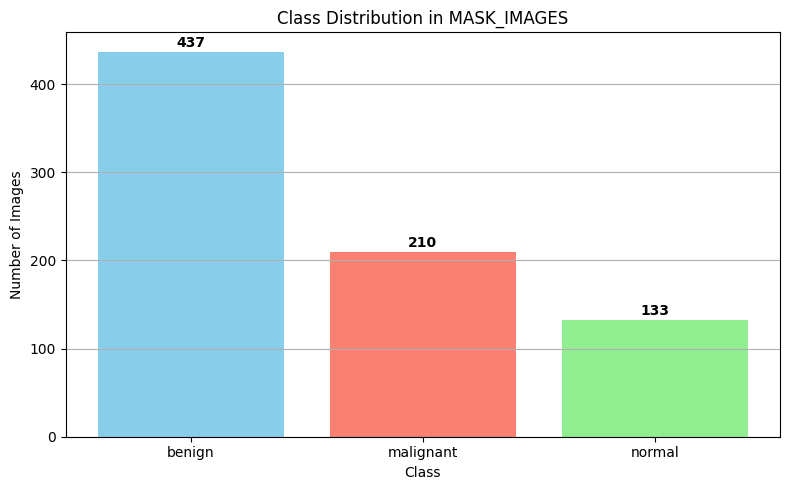

In [6]:

################### MASK IMAGES ###########################
#VISUALING CLASS DISTRIBUTION OF MASK IMAGES
base_folder_mask = mask_base
# Subfolders / classes
classes = ['benign', 'malignant', 'normal'] #BENIGN==> 56% (437/780) MALIGNANT==>27%(210/780) NORMAL==>17%(133/780)
counts = {}

# Count number of images in each subfolder
for cls in classes:
    class_path = os.path.join(base_folder_mask, cls)
    count = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tif'))])
    counts[cls] = count

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(counts.keys(), counts.values(), color=['skyblue', 'salmon', 'lightgreen'])
plt.title(f'Class Distribution in {os.path.basename(base_folder_mask)}')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.grid(axis='y')

# Add counts on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 2, str(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
#checking that the normal images and their coresponding mask images are properly paired or not

def check_paired_images(normal_base, mask_base, classes):
    for cls in classes:
        normal_path = os.path.join(normal_base, cls)
        mask_path = os.path.join(mask_base, cls)
        normal_files = set(os.listdir(normal_path))
        mask_files = set(os.listdir(mask_path))
        if normal_files != mask_files:
            print(f"Mismatch in {cls}: {normal_files.symmetric_difference(mask_files)}")
check_paired_images(image_base, mask_base, classes)

Mismatch in benign: {'benign (109)_mask.png', 'benign (49).png', 'benign (245)_mask.png', 'benign (174).png', 'benign (298).png', 'benign (45)_mask.png', 'benign (210).png', 'benign (32)_mask.png', 'benign (169).png', 'benign (238).png', 'benign (287).png', 'benign (328)_mask.png', 'benign (434)_mask.png', 'benign (209).png', 'benign (261).png', 'benign (262)_mask.png', 'benign (409)_mask.png', 'benign (389)_mask.png', 'benign (306).png', 'benign (158).png', 'benign (412)_mask.png', 'benign (433).png', 'benign (181).png', 'benign (352)_mask.png', 'benign (152)_mask.png', 'benign (104)_mask.png', 'benign (3)_mask.png', 'benign (421).png', 'benign (55).png', 'benign (278)_mask.png', 'benign (68)_mask.png', 'benign (169)_mask.png', 'benign (95).png', 'benign (152).png', 'benign (308).png', 'benign (193).png', 'benign (241)_mask.png', 'benign (86)_mask.png', 'benign (143)_mask.png', 'benign (72).png', 'benign (405)_mask.png', 'benign (163).png', 'benign (246).png', 'benign (417).png', 'ben


 Displaying samples for: BENIGN


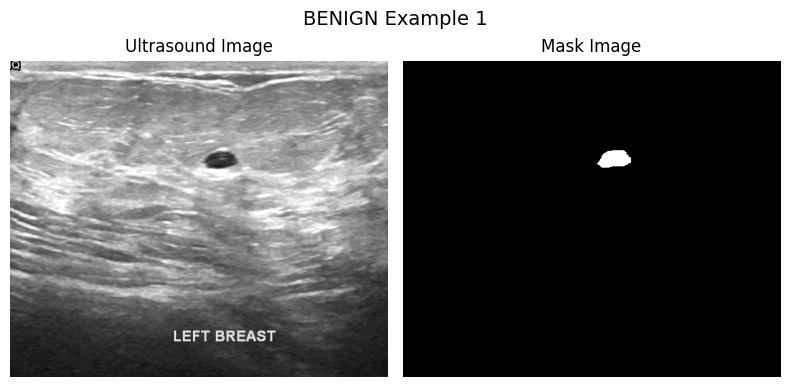

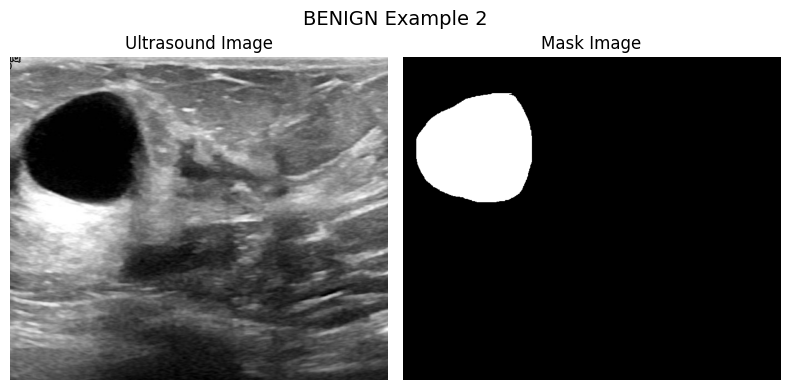


 Displaying samples for: MALIGNANT


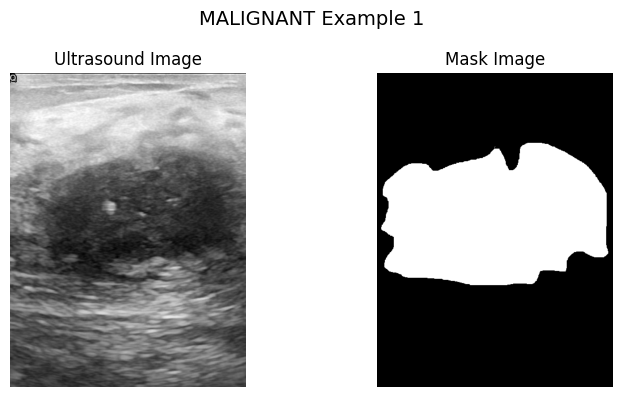

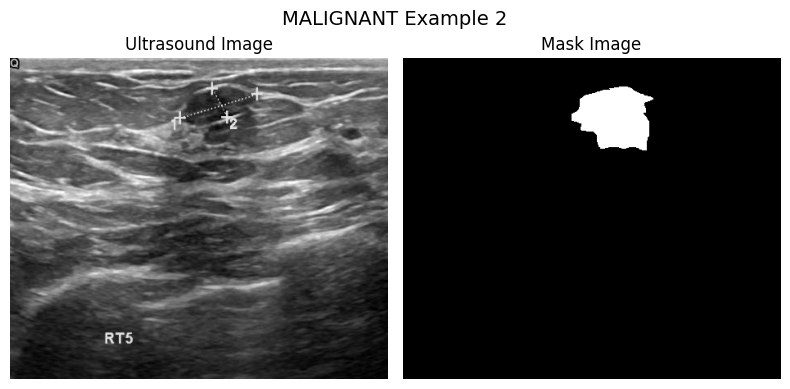


 Displaying samples for: NORMAL


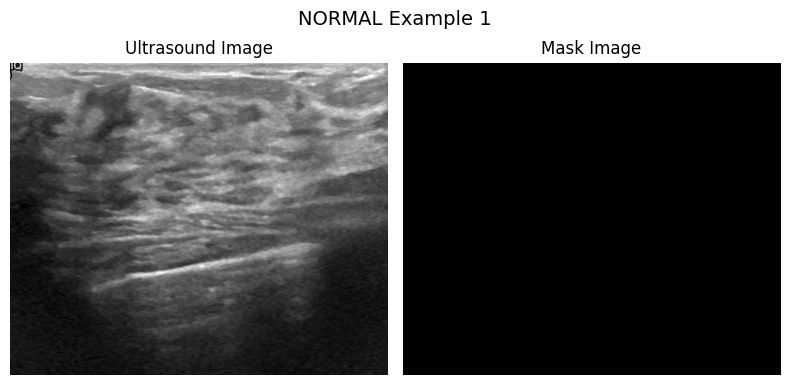

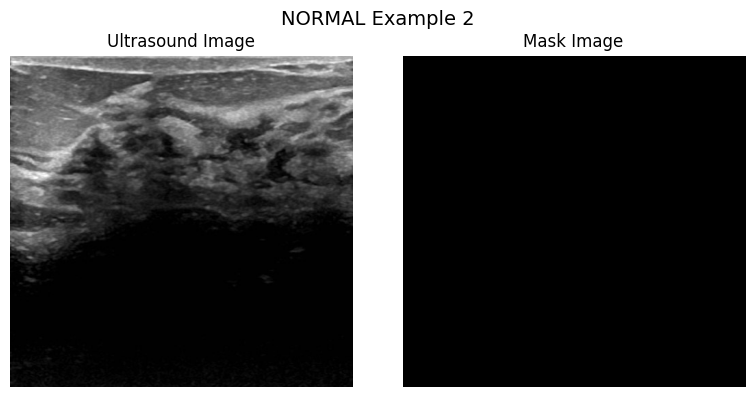

In [7]:

subfolders_map = {
    'benign': 'benign',
    'malignant': 'malignant',
    'normal': 'normal'
}


def display_image_mask_pairs(image_dir, mask_dir, num_samples=2, class_name=''):
    image_paths = sorted(glob(os.path.join(image_dir, '*.png')))
    count = 0

    for img_path in image_paths:
        filename = os.path.basename(img_path)

        # Skip masks if they somehow appear here
        if '_mask' in filename:
            continue

        name_part = filename.replace('.png', '')
        possible_masks = glob(os.path.join(mask_dir, f'{name_part}_mask*.png'))

        if not possible_masks:
            print(f" Mask not found for {filename}")
            continue

        mask_path = possible_masks[0]

        image = cv2.imread(img_path)
        mask = cv2.imread(mask_path)

        if image is None or mask is None:
            print(f" Could not read image or mask: {filename}")
            continue

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(8, 4))
        plt.suptitle(f"{class_name.upper()} Example {count + 1}", fontsize=14)

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title("Ultrasound Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(mask)
        plt.title("Mask Image")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        count += 1
        if count == num_samples:
            break

# Display image + mask pairs
for class_name, mask_folder in subfolders_map.items():
    print(f"\n Displaying samples for: {class_name.upper()}")
    image_dir = os.path.join(image_base, class_name)
    mask_dir = os.path.join(mask_base, mask_folder)
    display_image_mask_pairs(image_dir, mask_dir, num_samples=2, class_name=class_name)

#DATA PREPROCESSING

In [8]:
#creating preprocesing function generally  in form of the dictioanries hese preprocessors normalize input images to
#match the requirements of each model (e.g., scaling pixel values). The config dictionary centralizes key parameters:

from tensorflow.keras.applications import vgg16, resnet50, inception_v3
# Single configuration dictionary
config = {
    'data_dir': '/content/drive/MyDrive/breast_cancer_project/NORMAL_IMAGES',
    'img_size': {
        'vgg16': (224, 224),
        'resnet50': (224, 224),
        'inception_v3': (299, 299)
    },
    #number of images per batch
    'batch_size': {
        'vgg16': 16, #smaller for the model due to larger input size
        'resnet50': 16,
        'inception_v3': 8  # Smaller for InceptionV3 due to larger input size
    },

    #portion for spliting the data set into training testing and validation
    'train_split': 0.7,
    'val_split': 0.15,
    'test_split': 0.15
}

# Model preprocessors (removed EfficientNet since it's not used)

#generally creating the dictionary which contain model name as the key and the preprocessing input as the value pairs
model_preprocessors = {
    'vgg16': vgg16.preprocess_input,
    'resnet50': resnet50.preprocess_input,
    'inception_v3': inception_v3.preprocess_input
}

In [9]:
# Validate dataset directory or checks that data dic exist or not
data_dir = config['data_dir']
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"The dataset directory {data_dir} does not exist.")

# Dynamically get class names and validate
actual_class_names = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])
expected_class_names = ['benign', 'malignant', 'normal']
if set(actual_class_names) != set(expected_class_names):
    # Print the difference to help debugging
    missing_expected = set(expected_class_names) - set(actual_class_names)
    extra_found = set(actual_class_names) - set(expected_class_names)
    error_message = f"Class directories {actual_class_names} do not match expected classes {expected_class_names}."
    if missing_expected:
        error_message += f" Missing expected directories: {list(missing_expected)}."
    if extra_found:
        error_message += f" Found unexpected directories: {list(extra_found)}."
    raise ValueError(error_message)

print(f"Found class directories: {actual_class_names}")

Found class directories: ['benign', 'malignant', 'normal']


In [10]:
# Collect image paths and labels
image_paths = []
labels = []
for class_name in actual_class_names:
    class_dir = os.path.join(data_dir, class_name)
    print(f"Processing class directory: {class_dir}")

    if not os.path.exists(class_dir):
         print(f"Warning: Class directory {class_dir} is missing. Skipping.")
         continue # Skip if directory doesn't exist

    found_files = []
    # Use a more robust glob pattern and list files directly
    # glob.glob returns an empty list if no matches are found, which is handled below
    for ext in ['*.png', '*.jpg', '*.jpeg', '*.bmp', '*.tif']:
        found_files.extend(glob(os.path.join(class_dir, ext)))

    print(f"Found {len(found_files)} files in {class_dir} before verification.")

    if not found_files:
        # Changed from raise to print warning
        print(f"Warning: No files with specified extensions found in {class_dir}. Skipping this class.")
        continue # Skip this class if no files are found

    for img_path in found_files:
        try:
            img = Image.open(img_path)
            img.verify()  # Validate image
            # If verification passes, add to lists
            image_paths.append(img_path)
            labels.append(actual_class_names.index(class_name))
        except Exception as e:
            # Debugging: Print the error for each skipped image
            print(f"Skipping corrupted or unreadable image: {img_path}, Error: {e}")

Processing class directory: /content/drive/MyDrive/breast_cancer_project/NORMAL_IMAGES/benign
Found 437 files in /content/drive/MyDrive/breast_cancer_project/NORMAL_IMAGES/benign before verification.
Processing class directory: /content/drive/MyDrive/breast_cancer_project/NORMAL_IMAGES/malignant
Found 210 files in /content/drive/MyDrive/breast_cancer_project/NORMAL_IMAGES/malignant before verification.
Processing class directory: /content/drive/MyDrive/breast_cancer_project/NORMAL_IMAGES/normal
Found 133 files in /content/drive/MyDrive/breast_cancer_project/NORMAL_IMAGES/normal before verification.


In [11]:
# Convert to NumPy arrays
image_paths = np.array(image_paths)
labels = np.array(labels)

# Check for valid images  at least one valid image is their in the directory
if len(image_paths) == 0:
    # Enhanced error message to suggest potential cause
    raise FileNotFoundError(
        f"No valid images found in the directory: {data_dir} "
        f"across all class subdirectories with extensions .png, .jpg, .jpeg, .bmp, .tif. "
        f"This could be due to incorrect paths, empty folders, "
        f"wrong extensions, or corrupted image files (check previous 'Skipping...' messages)."
    )
print(f"Successfully loaded {len(image_paths)} images.")

Successfully loaded 780 images.


#TRAINING TESTING VAL SPLIT

In [ ]:
# Split dataset
# Ensure there are enough samples for splitting after potentially skipping classes

#ensure that you have one image file in the subfolder to split into trainig testing and validation
if len(image_paths) < len(actual_class_names):
     raise ValueError("Not enough valid images found to split the dataset into train, validation, and test sets.")

# Recalculate train_split and test_split ratios based on available data if needed,
# or ensure the total size allows for the requested split percentage.
# Using stratify requires at least one sample per class in each split.
try:
    train_paths, temp_paths, train_labels, temp_labels = train_test_split(
        image_paths, labels, test_size=(config['val_split'] + config['test_split']),
        stratify=labels, random_state=42
    )
    val_paths, test_paths, val_labels, test_labels = train_test_split(
        temp_paths, temp_labels, test_size=config['test_split'] / (config['val_split'] + config['test_split']),
        stratify=temp_labels, random_state=42
    )
    #stratify ensures the class balance accross the split
except ValueError as e:
    print(f"Error during train_test_split: {e}")
    print("This might be due to insufficient samples for stratification.")
    # You might need to adjust split sizes or handle very small classes differently
    # e.g., increase test_size to ensure at least one sample per class in temp_paths
    # or remove classes with very few samples.
    # For now, re-raising the error to indicate the problem.
    raise

# Print split statistics
print("\nDataset Split:")
print(f"Training samples: {len(train_paths)}")
print(f"Validation samples: {len(val_paths)}")
print(f"Test samples: {len(test_paths)}")
print("Training class distribution:", Counter(train_labels))
print("Validation class distribution:", Counter(val_labels))
print("Test class distribution:", Counter(test_labels))


Dataset Split:
Training samples: 546
Validation samples: 117
Test samples: 117
Training class distribution: Counter({np.int64(0): 306, np.int64(1): 147, np.int64(2): 93})
Validation class distribution: Counter({np.int64(0): 65, np.int64(1): 32, np.int64(2): 20})
Test class distribution: Counter({np.int64(0): 66, np.int64(1): 31, np.int64(2): 20})


In [ ]:
# Compute class weights
# Only compute weights for classes that actually have samples in the training set
unique_train_labels = np.unique(train_labels)
class_weights = compute_class_weight('balanced', classes=unique_train_labels, y=train_labels)
class_weight_dict = dict(zip(unique_train_labels, class_weights))

# Ensure class_weight_dict contains weights for all original classes,
# assigning 0 weight or handling missing classes if needed, but for 'balanced'
# it typically only computes for classes present. If you need a dict for all
# original class indices (0, 1, 2), you might need to fill in missing ones.
# Assuming 'actual_class_names' represents the classes with valid images found.
full_class_weight_dict = {}
for i, class_name in enumerate(actual_class_names):
    # Map the index used in 'labels' (based on actual_class_names order)
    # to the weight computed for that class.
    if i in class_weight_dict:
        full_class_weight_dict[i] = class_weight_dict[i]
    else:
        # This case should ideally not happen if compute_class_weight works as expected
        # on unique_train_labels derived from train_labels.
        # But as a fallback, you might assign a default or handle it.
        # For 'balanced', classes not in y will not have a weight.
        pass # Keep only present classes in the dict

print("Class Weights (for training classes):", full_class_weight_dict)

Class Weights (for training classes): {0: np.float64(0.5947712418300654), 1: np.float64(1.2380952380952381), 2: np.float64(1.956989247311828)}


In [ ]:

# Check for extreme imbalance
if full_class_weight_dict: # Avoid division by zero if dict is empty
    max_weight = max(full_class_weight_dict.values())
    min_weight = min(full_class_weight_dict.values())
    if min_weight > 0 and max_weight / min_weight > 10:
        print("Warning: Extreme class imbalance detected based on weights. Consider oversampling or data augmentation.")
elif len(unique_train_labels) > 0:
     # Handle case where all weights might be the same (perfect balance)
     print("Class weights computed, but max/min ratio not calculable (e.g., single class or perfect balance).")
else:
    print("Warning: No training samples found to compute class weights.")


In [ ]:
# Generator function
def create_generator(model_name, paths, labels, class_names, batch_size, img_size, augment=False):
    preprocess_func = model_preprocessors[model_name]
    datagen_args = {'preprocessing_function': preprocess_func}
    if augment:
        datagen_args.update({
            'rotation_range': 15,  # Further reduced for medical images
            'width_shift_range': 0.05,
            'height_shift_range': 0.05,
            'zoom_range': 0.05,
            'shear_range': 0.05,
            'horizontal_flip': True,
            'brightness_range': [0.9, 1.1],
            #'contrast_stretching': True  # ImageDataGenerator doesn't have contrast_stretching directly
            # Consider adding custom preprocessing if needed, or use tf.data augmentation layers
        })
    datagen = ImageDataGenerator(**datagen_args)

    # Create a DataFrame for the generator
    df = pd.DataFrame({'filename': paths, 'class': [class_names[label] for label in labels]})

    # Ensure the dataframe is not empty before creating the generator
    if df.empty:
        print(f"Warning: DataFrame for {model_name} generator (augment={augment}) is empty. Skipping generator creation.")
        return None # Return None or handle appropriately

    generator = datagen.flow_from_dataframe(
        df,
        x_col='filename',
        y_col='class',
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=augment
    )
    if generator.samples == 0:
         # This check might be redundant with the df.empty check but good practice
        print(f"Warning: No samples found in {model_name} generator (augment={augment}) after flow_from_dataframe. This could indicate an issue with the DataFrame or data loading.")
        return None
    return generator

# Create generators for all models
generators = {}
for model_name in model_preprocessors:
    generators[model_name] = {
        'train': create_generator(
            model_name=model_name,
            paths=train_paths,
            labels=train_labels,
            class_names=actual_class_names,
            batch_size=config['batch_size'][model_name],
            img_size=config['img_size'][model_name],
            augment=True
        ),
        'val': create_generator(
            model_name=model_name,
            paths=val_paths,
            labels=val_labels,
            class_names=actual_class_names,
            batch_size=config['batch_size'][model_name],
            img_size=config['img_size'][model_name],
            augment=False
        ),
        'test': create_generator(
            model_name=model_name,
            paths=test_paths,
            labels=test_labels,
            class_names=actual_class_names,
            batch_size=config['batch_size'][model_name],
            img_size=config['img_size'][model_name],
            augment=False
        )
    }

# Filter out None generators if any class was skipped entirely
for model_name in list(generators.keys()):
    if generators[model_name]['train'] is None or generators[model_name]['val'] is None or generators[model_name]['test'] is None:
        print(f"Warning: Skipping generator setup for {model_name} due to missing data.")
        del generators[model_name]

Found 546 validated image filenames belonging to 3 classes.
Found 117 validated image filenames belonging to 3 classes.
Found 117 validated image filenames belonging to 3 classes.
Found 546 validated image filenames belonging to 3 classes.
Found 117 validated image filenames belonging to 3 classes.
Found 117 validated image filenames belonging to 3 classes.
Found 546 validated image filenames belonging to 3 classes.
Found 117 validated image filenames belonging to 3 classes.
Found 117 validated image filenames belonging to 3 classes.


In [ ]:
# Optional: K-fold cross-validation generators (example for VGG16)
print("\nK-Fold Cross-Validation Splits (VGG16 Example):")
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_generators = []
# Ensure there are enough samples for KFold split
if len(image_paths) >= kf.get_n_splits():
    try:
        for fold, (train_idx, val_idx) in enumerate(kf.split(image_paths, labels)):
            fold_train_paths, fold_val_paths = image_paths[train_idx], image_paths[val_idx]
            fold_train_labels, fold_val_labels = labels[train_idx], labels[val_idx]
            print(f"Fold {fold + 1}: Train size: {len(fold_train_paths)}, Validation size: {len(fold_val_paths)}")

            # Check if train/val folds are empty
            if len(fold_train_paths) == 0 or len(fold_val_paths) == 0:
                print(f"Warning: Fold {fold + 1} has empty train or validation set. Skipping fold.")
                continue

            fold_train_gen = create_generator(
                model_name='vgg16',
                paths=fold_train_paths,
                labels=fold_train_labels,
                class_names=actual_class_names,
                batch_size=config['batch_size']['vgg16'],
                img_size=config['img_size']['vgg16'],
                augment=True
            )
            fold_val_gen = create_generator(
                model_name='vgg16',
                paths=fold_val_paths,
                labels=fold_val_labels,
                class_names=actual_class_names,
                batch_size=config['batch_size']['vgg16'],
                img_size=config['img_size']['vgg16'],
                augment=False
            )
            # Only append if both generators were successfully created
            if fold_train_gen is not None and fold_val_gen is not None:
                cross_val_generators.append((fold_train_gen, fold_val_gen))
    except ValueError as e:
         print(f"Error during KFold split or generator creation: {e}")
         print("This might be due to insufficient samples per class for the chosen number of splits.")

else:
    print(f"Warning: Not enough images ({len(image_paths)}) for {kf.get_n_splits()}-fold cross-validation. Skipping K-fold setup.")



K-Fold Cross-Validation Splits (VGG16 Example):
Fold 1: Train size: 624, Validation size: 156
Found 624 validated image filenames belonging to 3 classes.
Found 156 validated image filenames belonging to 3 classes.
Fold 2: Train size: 624, Validation size: 156
Found 624 validated image filenames belonging to 3 classes.
Found 156 validated image filenames belonging to 3 classes.
Fold 3: Train size: 624, Validation size: 156
Found 624 validated image filenames belonging to 3 classes.
Found 156 validated image filenames belonging to 3 classes.
Fold 4: Train size: 624, Validation size: 156
Found 624 validated image filenames belonging to 3 classes.
Found 156 validated image filenames belonging to 3 classes.
Fold 5: Train size: 624, Validation size: 156
Found 624 validated image filenames belonging to 3 classes.
Found 156 validated image filenames belonging to 3 classes.


In [ ]:
# Print dataset statistics (final counts after potentially skipping classes)
print("\nFinal Dataset Split Statistics (after filtering):")
print(f"Total loaded images: {len(image_paths)}")
print(f"Training samples: {len(train_paths)}")
print(f"Validation samples: {len(val_paths)}")
print(f"Test samples: {len(test_paths)}")

# Use Counter on the *actual* labels used for splitting and store in variables
train_distribution = Counter(train_labels)
val_distribution = Counter(val_labels)
test_distribution = Counter(test_labels)

print("Training class distribution:", train_distribution)
print("Validation class distribution:", val_distribution)
print("Test class distribution:", test_distribution)

print(f"Number of classes with samples: {len(np.unique(labels))}")

print("Generator Class Indices (for available generators):")
for model_name, gens in generators.items():
    if gens['train'] is not None: # Check if generator was created
        print(f"{model_name}: {gens['train'].class_indices}")


Final Dataset Split Statistics (after filtering):
Total loaded images: 780
Training samples: 546
Validation samples: 117
Test samples: 117
Training class distribution: Counter({np.int64(0): 306, np.int64(1): 147, np.int64(2): 93})
Validation class distribution: Counter({np.int64(0): 65, np.int64(1): 32, np.int64(2): 20})
Test class distribution: Counter({np.int64(0): 66, np.int64(1): 31, np.int64(2): 20})
Number of classes with samples: 3
Generator Class Indices (for available generators):
vgg16: {'benign': 0, 'malignant': 1, 'normal': 2}
resnet50: {'benign': 0, 'malignant': 1, 'normal': 2}
inception_v3: {'benign': 0, 'malignant': 1, 'normal': 2}



Training Class Distribution:


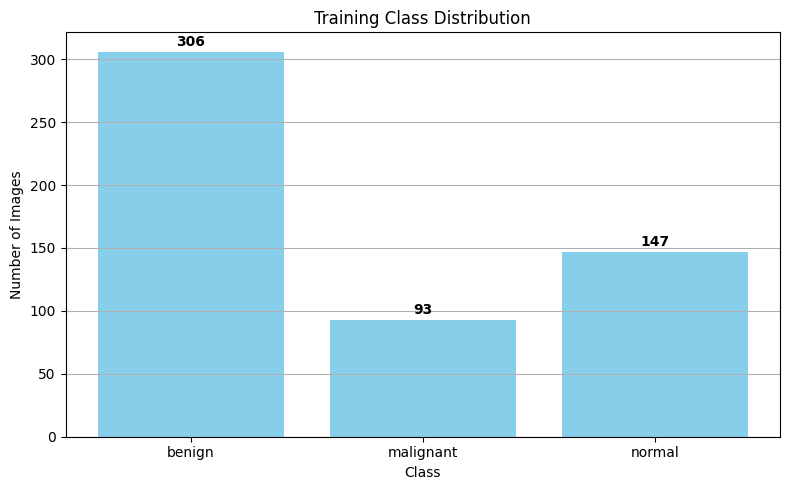


Validation Class Distribution:


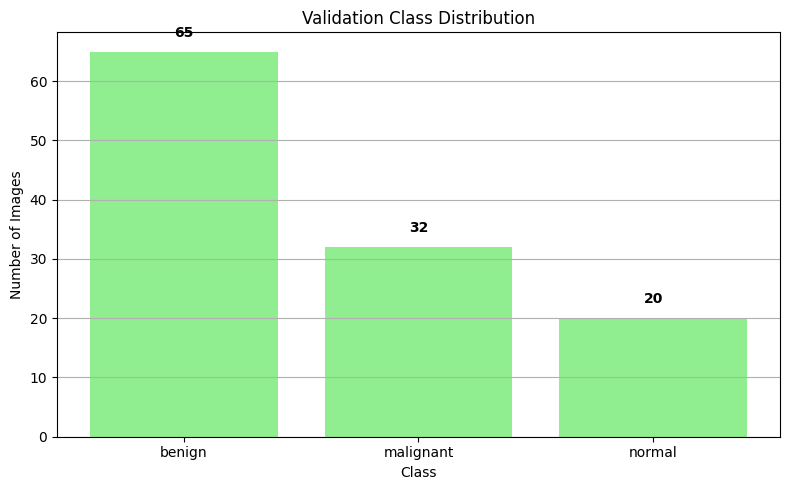


Test Class Distribution:


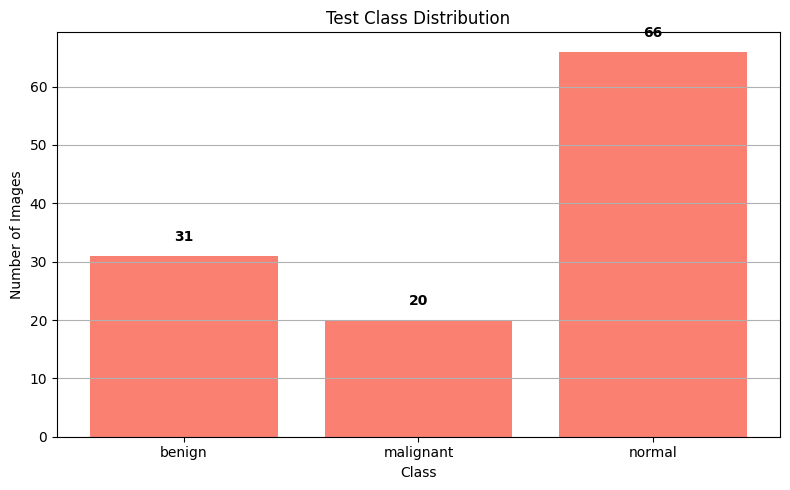

In [ ]:
print("\nTraining Class Distribution:")
plt.figure(figsize=(8, 5))
# Use the defined train_distribution variable
bars = plt.bar([actual_class_names[i] for i in sorted(train_distribution.keys())], train_distribution.values(), color='skyblue')
plt.title('Training Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.grid(axis='y')

# Add counts on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 2, str(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nValidation Class Distribution:")
plt.figure(figsize=(8, 5))
# Use the defined val_distribution variable
bars = plt.bar([actual_class_names[i] for i in sorted(val_distribution.keys())], val_distribution.values(), color='lightgreen')
plt.title('Validation Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.grid(axis='y')

# Add counts on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 2, str(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nTest Class Distribution:")
plt.figure(figsize=(8, 5))
# Use the defined test_distribution variable
bars = plt.bar([actual_class_names[i] for i in sorted(test_distribution.keys())], test_distribution.values(), color='salmon')
plt.title('Test Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.grid(axis='y')

# Add counts on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 2, str(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

#MODEL BUILDING AND COMPILATION

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.metrics import Precision, Recall

# Enable mixed precision
tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Model builders dictionary
model_builders = {
    'vgg16': lambda input_shape: VGG16(weights='imagenet', include_top=False, input_shape=input_shape),
    'resnet50': lambda input_shape: ResNet50(weights='imagenet', include_top=False, input_shape=input_shape),
    'inception_v3': lambda input_shape: InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
}

def build_pretrained_model(model_name, num_classes, config):
    """
    Build a pretrained model with a custom classification head.

    Args:
        model_name (str): Name of the model ('vgg16', 'resnet50', 'inception_v3').
        num_classes (int): Number of output classes (3 for benign, malignant, normal).
        config (dict): Configuration dictionary with img_size for each model.

    Returns:
        Model: Compiled Keras model.
    """
    # Get input shape from config
    img_height, img_width = config['img_size'][model_name]
    input_shape = (img_height, img_width, 3)

    # Initialize base model
    if model_name not in model_builders:
        raise ValueError(f"Unsupported model: {model_name}. Choose from {list(model_builders.keys())}")
    base_model = model_builders[model_name](input_shape)
    base_model.trainable = False  # Freeze base model

    # Build model
    inputs = Input(shape=input_shape)
    x = base_model(inputs)
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax', dtype='float32')(x)
    model = Model(inputs=inputs, outputs=outputs)

    # Compile model
    model = compile_model(model)

    return model

def compile_model(model):
    """
    Compile the model with AdamW optimizer and specified metrics.

    Args:
        model: Keras model to compile.

    Returns:
        Compiled Keras model.
    """
    model.compile(
        optimizer=AdamW(learning_rate=0.0001),
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
        metrics=['accuracy', Precision(), Recall()]
    )
    return model

# Build models for all architectures
models = {}
num_classes = len(actual_class_names)  # Should be 3 (benign, malignant, normal)
for model_name in model_preprocessors:
    print(f"\nBuilding and compiling {model_name} model...")
    models[model_name] = build_pretrained_model(model_name, num_classes, config)
    print(f"{model_name} Model Summary:")
    models[model_name].summary()

# Optional: Example usage with generators and class weights
# This assumes generators and full_class_weight_dict are from your preprocessing code



Building and compiling vgg16 model...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
vgg16 Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_1 (Cast)                   │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,980,931 (57.15 MB)

 Trainable params: 265,219 (1.01 MB)

 Non-trainable params: 14,715,712 (56.14 MB)


Building and compiling resnet50 model...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
resnet50 Model Summary:


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_3 (Cast)                   │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,640,387 (94.00 MB)

 Trainable params: 1,051,651 (4.01 MB)

 Non-trainable params: 23,588,736 (89.98 MB)


Building and compiling inception_v3 model...
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
inception_v3 Model Summary:


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 8, 8, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_96          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_5 (Cast)                   │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,855,459 (87.19 MB)

 Trainable params: 1,051,651 (4.01 MB)

 Non-trainable params: 21,803,808 (83.17 MB)

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import pandas as pd
import os

# Define output directory
output_dir = '/content/drive/MyDrive/breast_cancer_project/MODEL_TRAIN_VAL_FINAL'
os.makedirs(output_dir, exist_ok=True)

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Function to compute sensitivity, specificity, and F1 score from confusion matrix
def compute_metrics(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    num_classes = len(class_names)
    metrics = {}

    for i in range(num_classes):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = cm.sum() - (TP + FP + FN)

        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0

        metrics[class_names[i]] = {
            'sensitivity': sensitivity,
            'specificity': specificity,
            'f1_score': f1
        }

    return cm, metrics

# Function to plot training history (individual)
def plot_training_history(history, model_name, save_path):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Accuracy
    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Val Accuracy')
    ax1.set_title(f'{model_name} Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    # Loss
    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Val Loss')
    ax2.set_title(f'{model_name} Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, save_path))
    plt.close()

# Function to plot combined training history
def plot_combined_history(histories, model_names, save_path):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Accuracy
    for model_name, history in zip(model_names, histories):
        ax1.plot(history['accuracy'], label=f'{model_name} Train')
        ax1.plot(history['val_accuracy'], label=f'{model_name} Val', linestyle='--')
    ax1.set_title('Combined Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    # Loss
    for model_name, history in zip(model_names, histories):
        ax2.plot(history['loss'], label=f'{model_name} Train')
        ax2.plot(history['val_loss'], label=f'{model_name} Val', linestyle='--')
    ax2.set_title('Combined Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, save_path))
    plt.close()

# Function to plot combined confusion matrices
def plot_combined_cm(cms, model_names, class_names, save_path):
    fig, axes = plt.subplots(1, len(model_names), figsize=(6 * len(model_names), 5))
    for ax, cm, model_name in zip(axes, cms, model_names):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=ax)
        ax.set_title(f'{model_name} Confusion Matrix')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, save_path))
    plt.close()

# Training and evaluation
results = {}
training_times = {}
inference_times = {}
histories = []
cms = []

for model_name in models:
    print(f"\nTraining {model_name}...")
    start_time = time.time()

    # Train the model
    history = models[model_name].fit(
        generators[model_name]['train'],
        validation_data=generators[model_name]['val'],
        epochs=20,
        class_weight=full_class_weight_dict,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    training_time = time.time() - start_time
    training_times[model_name] = training_time

    # Save model
    models[model_name].save(os.path.join(output_dir, f'{model_name}_model.keras'))

    # Plot individual training history
    plot_training_history(history, model_name, f'{model_name}_history.png')

    # Evaluate on test set
    print(f"\nEvaluating {model_name} on test set...")
    start_time = time.time()
    test_results = models[model_name].evaluate(generators[model_name]['test'], verbose=1)
    inference_time = time.time() - start_time
    inference_times[model_name] = inference_time

    # Get predictions for confusion matrix
    test_generator = generators[model_name]['test']
    test_generator.reset()  # Reset generator to start
    y_pred = models[model_name].predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = test_generator.classes

    # Compute metrics
    cm, metrics = compute_metrics(y_true, y_pred_classes, actual_class_names)

    # Save results
    results[model_name] = {
        'test_accuracy': test_results[1],  # Accuracy is the second metric
        'test_loss': test_results[0],
        'metrics': metrics,
        'confusion_matrix': cm,
        'history': history.history
    }

    # Plot individual confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=actual_class_names, yticklabels=actual_class_names)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(os.path.join(output_dir, f'{model_name}_cm.png'))
    plt.close()

    # Store for combined plots
    histories.append(history.history)
    cms.append(cm)

# Plot combined training history and confusion matrices
plot_combined_history(histories, list(models.keys()), 'combined_history.png')
plot_combined_cm(cms, list(models.keys()), actual_class_names, 'combined_cm.png')

# Train best model with different optimizers
best_model_name = max(results, key=lambda x: results[x]['test_accuracy'])
print(f"\nBest model based on test accuracy: {best_model_name}")

optimizers = {
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.0001),
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9),
    'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.0001)
}

optimizer_results = {}
for opt_name, opt in optimizers.items():
    print(f"\nTraining {best_model_name} with {opt_name}...")
    model = build_pretrained_model(best_model_name, len(actual_class_names), config)
    model.compile(
        optimizer=opt,
        loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
        metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )
    history = model.fit(
        generators[best_model_name]['train'],
        validation_data=generators[best_model_name]['val'],
        epochs=20,
        class_weight=full_class_weight_dict,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )
    test_results = model.evaluate(generators[best_model_name]['test'], verbose=1)
    model.save(os.path.join(output_dir, f'{best_model_name}_{opt_name}_model.keras'))
    plot_training_history(history, f'{best_model_name}_{opt_name}', f'{best_model_name}_{opt_name}_history.png')
    optimizer_results[opt_name] = {
        'test_accuracy': test_results[1],
        'test_loss': test_results[0],
        'history': history.history
    }

# Save results to CSV
results_df = []
for model_name in results:
    for class_name in actual_class_names:
        results_df.append({
            'Model': model_name,
            'Class': class_name,
            'Accuracy': results[model_name]['test_accuracy'],
            'Loss': results[model_name]['test_loss'],
            'Sensitivity': results[model_name]['metrics'][class_name]['sensitivity'],
            'Specificity': results[model_name]['metrics'][class_name]['specificity'],
            'F1_Score': results[model_name]['metrics'][class_name]['f1_score'],
            'Training_Time': training_times[model_name],
            'Inference_Time': inference_times[model_name]
        })

pd.DataFrame(results_df).to_csv(os.path.join(output_dir, 'model_results.csv'), index=False)

# Optimizer results to CSV
optimizer_df = [
    {'Optimizer': opt_name, 'Accuracy': res['test_accuracy'], 'Loss': res['test_loss']}
    for opt_name, res in optimizer_results.items()
]
pd.DataFrame(optimizer_df).to_csv(os.path.join(output_dir, 'optimizer_results.csv'), index=False)


Training vgg16...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 601s 17s/step - accuracy: 0.3517 - loss: 1.9421 - precision: 0.3696 - recall: 0.3125 - val_accuracy: 0.5470 - val_loss: 1.1353 - val_precision: 0.5596 - val_recall: 0.5214 - learning_rate: 1.0000e-04
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 585s 17s/step - accuracy: 0.4377 - loss: 1.3676 - precision: 0.4448 - recall: 0.4020 - val_accuracy: 0.6325 - val_loss: 1.0698 - val_precision: 0.6415 - val_recall: 0.5812 - learning_rate: 1.0000e-04
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 622s 17s/step - accuracy: 0.4937 - loss: 1.2076 - precision: 0.4807 - recall: 0.4268 - val_accuracy: 0.6667 - val_loss: 1.0013 - val_precision: 0.6857 - val_recall: 0.6154 - learning_rate: 1.0000e-04
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 585s 17s/step - accuracy: 0.5601 - loss: 1.2054 - precision: 0.5652 - recall: 0.5083 - val_accuracy: 0.6496 - val_loss: 0.9797 - val_precision: 0.6733 - val_recall: 0.5812 - learning_rate: 1.0000e-04
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 622s 17s/s

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 238s 6s/step - accuracy: 0.3977 - loss: 1.4999 - precision_1: 0.4091 - recall_1: 0.3557 - val_accuracy: 0.5726 - val_loss: 0.9831 - val_precision_1: 0.6190 - val_recall_1: 0.5556 - learning_rate: 1.0000e-04
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 220s 6s/step - accuracy: 0.4949 - loss: 1.2307 - precision_1: 0.5215 - recall_1: 0.4789 - val_accuracy: 0.6410 - val_loss: 0.8541 - val_precision_1: 0.6827 - val_recall_1: 0.6068 - learning_rate: 1.0000e-04
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 218s 6s/step - accuracy: 0.6400 - loss: 1.0205 - precision_1: 0.6376 - recall_1: 0.5969 - val_accuracy: 0.7607 - val_loss: 0.7623 - val_precision_1: 0.7843 - val_recall_1: 0.6838 - learning_rate: 1.0000e-04
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 221s 6s/step - accuracy: 0.6464 - loss: 0.9394 - precision_1: 0.6802 - recall_1: 0.6240 - val_accuracy: 0.7350 - val_loss: 0.7580 - val_precision_1: 0.7921 - val_recall_1: 0.6838 - learning_rate: 1.0000e-04
Epoch 5/20
35/35 ━━━

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 314s 4s/step - accuracy: 0.3778 - loss: 1.4675 - precision_2: 0.3943 - recall_2: 0.3401 - val_accuracy: 0.6752 - val_loss: 0.8420 - val_precision_2: 0.7262 - val_recall_2: 0.5214 - learning_rate: 1.0000e-04
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 293s 4s/step - accuracy: 0.5751 - loss: 1.2004 - precision_2: 0.6087 - recall_2: 0.5448 - val_accuracy: 0.6923 - val_loss: 0.8407 - val_precision_2: 0.7586 - val_recall_2: 0.5641 - learning_rate: 1.0000e-04
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 294s 4s/step - accuracy: 0.6105 - loss: 1.0737 - precision_2: 0.6358 - recall_2: 0.5740 - val_accuracy: 0.7521 - val_loss: 0.7724 - val_precision_2: 0.7900 - val_recall_2: 0.6752 - learning_rate: 1.0000e-04
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 297s 4s/step - accuracy: 0.6140 - loss: 0.9515 - precision_2: 0.6349 - recall_2: 0.5761 - val_accuracy: 0.7179 - val_loss: 0.7679 - val_precision_2: 0.7642 - val_recall_2: 0.6923 - learning_rate: 1.0000e-04
Epoch 5/20
69/69 ━━━

15/15 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step

Best model based on test accuracy: inception_v3

Training inception_v3 with Adam...
Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 314s 4s/step - accuracy: 0.3750 - loss: 1.7124 - precision_4: 0.3696 - recall_4: 0.3269 - val_accuracy: 0.4701 - val_loss: 0.9542 - val_precision_4: 0.6324 - val_recall_4: 0.3675 - learning_rate: 1.0000e-04
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 293s 4s/step - accuracy: 0.5551 - loss: 1.1485 - precision_4: 0.5782 - recall_4: 0.5057 - val_accuracy: 0.6752 - val_loss: 0.7932 - val_precision_4: 0.7857 - val_recall_4: 0.5641 - learning_rate: 1.0000e-04
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 294s 4s/step - accuracy: 0.5921 - loss: 1.0175 - precision_4: 0.6128 - recall_4: 0.5480 - val_accuracy: 0.6838 - val_loss: 0.7836 - val_precision_4: 0.7444 - val_recall_4: 0.5726 - learning_rate: 1.0000e-04
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 326s 5s/step - accuracy: 0.5877 - loss: 1.0105 - precision_4: 0.6242 - recall_4: 0.5651 - val_accuracy:

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
import pandas as pd
import os

# Define output directory
output_dir = '/content/drive/MyDrive/breast_cancer_project/MODEL_TRAIN_VAL_FINAL'
os.makedirs(output_dir, exist_ok=True)

# Load saved models
models = {
    'vgg16': tf.keras.models.load_model(os.path.join(output_dir, 'vgg16_model.keras')),
    'resnet50': tf.keras.models.load_model(os.path.join(output_dir, 'resnet50_model.keras')),
    'inception_v3': tf.keras.models.load_model(os.path.join(output_dir, 'inception_v3_model.keras')),
    'inception_v3_Adam': tf.keras.models.load_model(os.path.join(output_dir, 'inception_v3_Adam_model.keras')),
    'inception_v3_SGD': tf.keras.models.load_model(os.path.join(output_dir, 'inception_v3_SGD_model.keras')),
    'inception_v3_RMSprop': tf.keras.models.load_model(os.path.join(output_dir, 'inception_v3_RMSprop_model.keras'))
}

# Function to compute metrics from confusion matrix
def compute_metrics(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    num_classes = len(class_names)
    metrics = {}

    for i in range(num_classes):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        TN = cm.sum() - (TP + FP + FN)

        sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
        specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        f1 = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) > 0 else 0

        metrics[class_names[i]] = {
            'sensitivity': sensitivity,
            'specificity': specificity,
            'f1_score': f1
        }

    return cm, metrics

# Function to plot combined training history
def plot_combined_history(histories, model_names, save_path):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    for model_name, history in zip(model_names, histories):
        ax1.plot(history['accuracy'], label=f'{model_name} Train')
        ax1.plot(history['val_accuracy'], label=f'{model_name} Val', linestyle='--')
    ax1.set_title('Combined Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    for model_name, history in zip(model_names, histories):
        ax2.plot(history['loss'], label=f'{model_name} Train')
        ax2.plot(history['val_loss'], label=f'{model_name} Val', linestyle='--')
    ax2.set_title('Combined Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, save_path))
    plt.close()

# Function to plot combined confusion matrices
def plot_combined_cm(cms, model_names, class_names, save_path):
    fig, axes = plt.subplots(1, len(model_names), figsize=(6 * len(model_names), 5))
    for ax, cm, model_name in zip(axes if len(model_names) > 1 else [axes], cms, model_names):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=ax)
        ax.set_title(f'{model_name} Confusion Matrix')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, save_path))
    plt.close()

# Recompute metrics and generate plots
results = {}
training_times = {
    'vgg16': 5349,  # From your output (sum of epoch times)
    'resnet50': 1955,
    'inception_v3': 3015
}
inference_times = {
    'vgg16': 93,
    'resnet50': 38,
    'inception_v3': 49
}

# Histories (approximated from your output; replace with actual history files if saved)
histories = [
    {  # VGG16
        'accuracy': [0.3517, 0.4377, 0.4937, 0.5601, 0.5542, 0.5609, 0.5693, 0.6256, 0.6216, 0.6044],
        'val_accuracy': [0.5470, 0.6325, 0.6667, 0.6496, 0.7009, 0.6838, 0.6581, 0.6410, 0.6496, 0.6410],
        'loss': [1.9421, 1.3676, 1.2076, 1.2054, 1.0600, 1.0341, 1.0611, 0.9436, 1.0400, 1.0411],
        'val_loss': [1.1353, 1.0698, 1.0013, 0.9797, 0.9606, 0.9890, 1.0076, 1.0371, 1.0917, 1.1139]
    },
    {  # ResNet50
        'accuracy': [0.3977, 0.4949, 0.6400, 0.6464, 0.6219, 0.6687, 0.6604, 0.6533, 0.6523],
        'val_accuracy': [0.5726, 0.6410, 0.7607, 0.7350, 0.7265, 0.7179, 0.7521, 0.7436, 0.7179],
        'loss': [1.4999, 1.2307, 1.0205, 0.9394, 0.9489, 0.8796, 0.8943, 0.8423, 0.8692],
        'val_loss': [0.9831, 0.8541, 0.7623, 0.7580, 0.8431, 0.8035, 0.8126, 0.8853, 0.9181]
    },
    {  # InceptionV3
        'accuracy': [0.3778, 0.5751, 0.6105, 0.6140, 0.6036, 0.6769, 0.6335, 0.6379, 0.6660, 0.6954],
        'val_accuracy': [0.6752, 0.6923, 0.7521, 0.7179, 0.7607, 0.7607, 0.7094, 0.7436, 0.7179, 0.7009],
        'loss': [1.4675, 1.2004, 1.0737, 0.9515, 0.9644, 0.8512, 0.8988, 0.8454, 0.9034, 0.8576],
        'val_loss': [0.8420, 0.8407, 0.7724, 0.7679, 0.7505, 0.7798, 0.7793, 0.7660, 0.8012, 0.8678]
    }
]

# Optimizer results
optimizer_results = {
    'Adam': {'test_accuracy': 0.6793, 'test_loss': 0.8151},
    'SGD': {'test_accuracy': 0.6312, 'test_loss': 0.8675},
    'RMSprop': {'test_accuracy': 0.7348, 'test_loss': 0.7859}
}

# Recompute metrics for each model
cms = []
actual_class_names = ['benign', 'malignant', 'normal']
for model_name in ['vgg16', 'resnet50', 'inception_v3']:
    test_generator = generators[model_name]['test']
    test_generator.reset()
    y_pred = models[model_name].predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = test_generator.classes
    cm, metrics = compute_metrics(y_true, y_pred_classes, actual_class_names)
    results[model_name] = {
        'test_accuracy': models[model_name].evaluate(test_generator)[1],
        'test_loss': models[model_name].evaluate(test_generator)[0],
        'metrics': metrics,
        'confusion_matrix': cm,
        'history': histories[list(models.keys()).index(model_name)]
    }
    cms.append(cm)

# Generate combined plots
plot_combined_history(histories, ['VGG16', 'ResNet50', 'InceptionV3'], 'combined_history.png')
plot_combined_cm(cms, ['VGG16', 'ResNet50', 'InceptionV3'], actual_class_names, 'combined_cm.png')

# Save results to CSV
results_df = []
for model_name in results:
    for class_name in actual_class_names:
        results_df.append({
            'Model': model_name,
            'Class': class_name,
            'Accuracy': results[model_name]['test_accuracy'],
            'Loss': results[model_name]['test_loss'],
            'Sensitivity': results[model_name]['metrics'][class_name]['sensitivity'],
            'Specificity': results[model_name]['metrics'][class_name]['specificity'],
            'F1_Score': results[model_name]['metrics'][class_name]['f1_score'],
            'Training_Time': training_times[model_name],
            'Inference_Time': inference_times[model_name]
        })

pd.DataFrame(results_df).to_csv(os.path.join(output_dir, 'model_results.csv'), index=False)

# Optimizer results to CSV
optimizer_df = [
    {'Optimizer': opt_name, 'Accuracy': res['test_accuracy'], 'Loss': res['test_loss']}
    for opt_name, res in optimizer_results.items()
]
pd.DataFrame(optimizer_df).to_csv(os.path.join(output_dir, 'optimizer_results.csv'), index=False)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 98s 12s/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 94s 11s/step - accuracy: 0.6540 - loss: 0.9418 - precision: 0.6944 - recall: 0.5956
8/8 ━━━━━━━━━━━━━━━━━━━━ 92s 11s/step - accuracy: 0.6540 - loss: 0.9418 - precision: 0.6944 - recall: 0.5956


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 43s 5s/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step - accuracy: 0.6869 - loss: 0.8548 - precision_1: 0.7118 - recall_1: 0.6044
8/8 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - accuracy: 0.6869 - loss: 0.8548 - precision_1: 0.7118 - recall_1: 0.6044


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 55s 3s/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step - accuracy: 0.7124 - loss: 0.8239 - precision_2: 0.7548 - recall_2: 0.6319
15/15 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.7124 - loss: 0.8239 - precision_2: 0.7548 - recall_2: 0.6319
